In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.ensemble
import sklearn.tree
from tqdm import tqdm

import gradient_boosting

%load_ext autoreload
%autoreload 2

We'll implement gradient boosting and then use it to approximate a 2D-gaussian

In [3]:
MEAN = [0, 0]
COVARIANCE = [[2.0, 0.3], [0.3, 0.5]]

# Make training data

In [4]:
df_examples = gradient_boosting.make_train_data(MEAN, COVARIANCE)

In [5]:
df_examples.head(2)

,x1,x2,label
0,2.201384,0.231178,0.049143
1,0.190119,-0.445879,0.129113


In [6]:
X_train = df_examples[['x1', 'x2']]
y_train = df_examples['label']

# Visualize training data in 3D

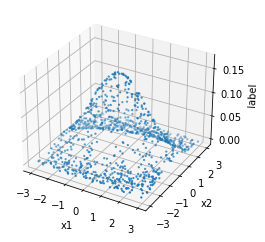

In [7]:
gradient_boosting.visualize_training_data(
    df_examples.sample(1000),
    x_col="x1",
    y_col="x2",
    z_col="label",
)

# Make test data

Not, test data are made to be on the grids delibrately to enable surface plot.

In [8]:
x1s_test, x2s_test = np.mgrid[
    -3:3:0.05,
    -3:3:0.05,
]

X_test = np.concatenate(
    [
        x1s_test.reshape(-1, 1),
        x2s_test.reshape(-1, 1),
    ],
    axis=1,
)

In [9]:
x1s_test.shape

(120, 120)

In [10]:
x2s_test.shape

(120, 120)

In [11]:
X_test

array([[-3.  , -3.  ],
       [-3.  , -2.95],
       [-3.  , -2.9 ],
       ...,
       [ 2.95,  2.85],
       [ 2.95,  2.9 ],
       [ 2.95,  2.95]])

In [12]:
y_test = scipy.stats.multivariate_normal(MEAN, COVARIANCE).pdf(X_test)

In [13]:
y_test

array([1.38624596e-05, 1.82955336e-05, 2.40139518e-05, ...,
       3.24555431e-05, 2.48426903e-05, 1.89113327e-05])

# Visualize the learned function with increasing number of estimators

CPU times: user 1.81 s, sys: 286 ms, total: 2.09 s
Wall time: 780 ms


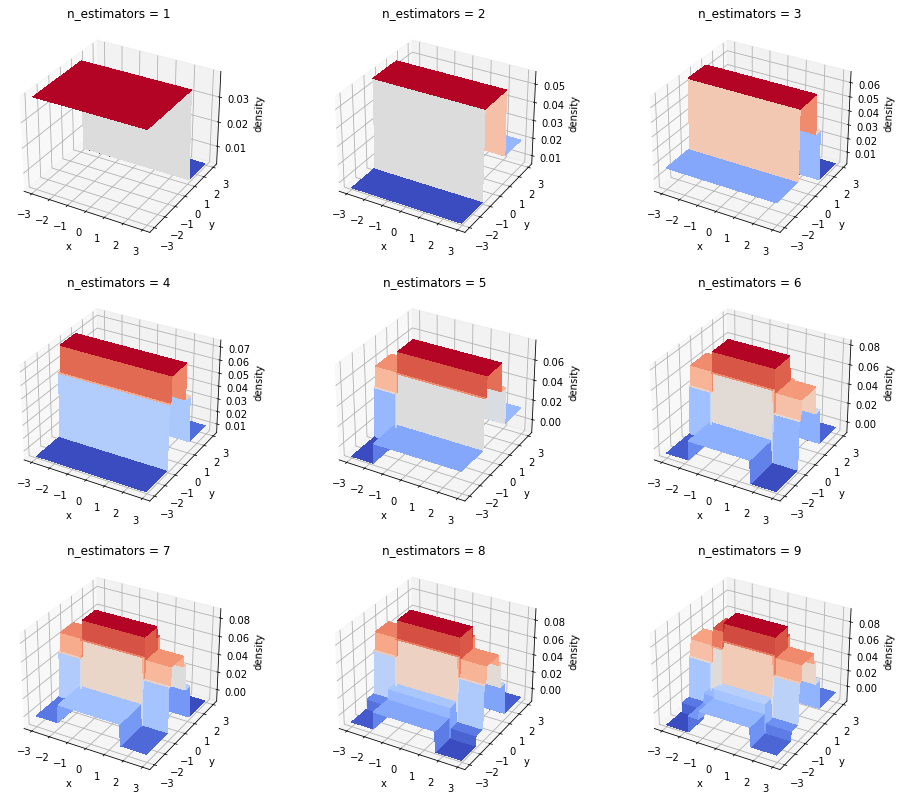

In [17]:
%%time
fig = plt.figure(figsize=(16, 14))

for k in range(1, 10):
    regressor = sklearn.ensemble.GradientBoostingRegressor(
        learning_rate=1,
        max_depth=1,
        n_estimators=k,
    )
    regressor.fit(X_train, y_train)
    preds_test = regressor.predict(X_test)

    ax = fig.add_subplot(3, 3, k, projection="3d")
    ax.plot_surface(
        x1s_test,
        x2s_test,
        preds_test.reshape(len(x1s_test), len(x1s_test)),
        rstride=1,
        cstride=1,
        cmap=matplotlib.cm.coolwarm,
        linewidth=0,
        antialiased=False,
    )

    ax.set(
        xlabel="x",
        ylabel="y",
        zlabel="density",
        title=f"n_estimators = {k}",
    )

max_depth > 1

CPU times: user 2.07 s, sys: 309 ms, total: 2.38 s
Wall time: 1.05 s


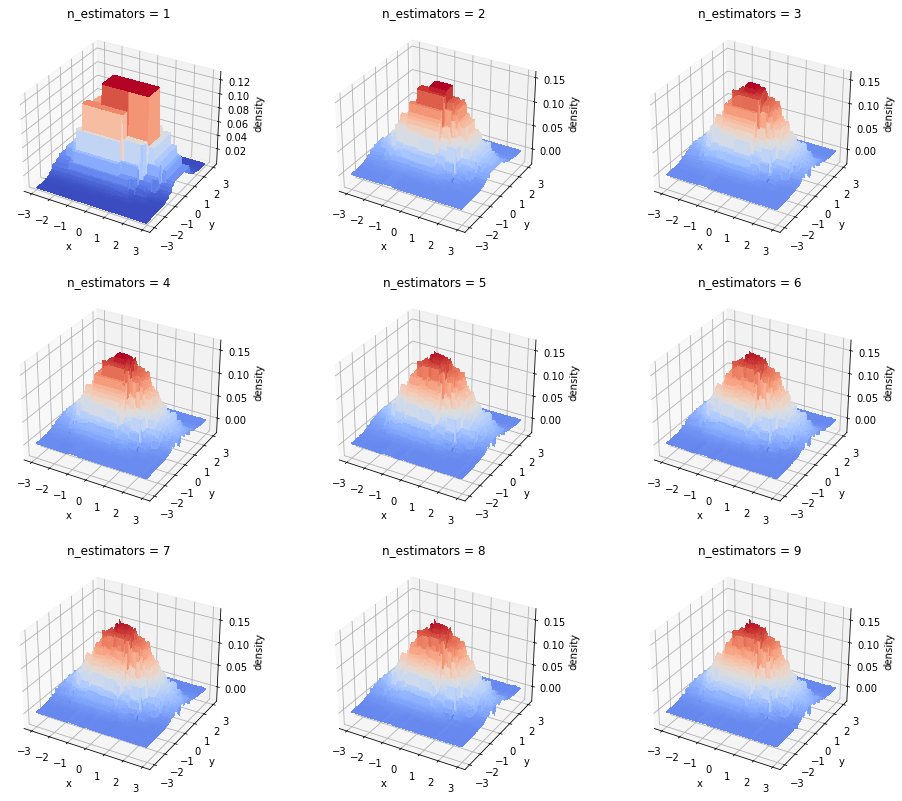

In [19]:
%%time
fig = plt.figure(figsize=(16, 14))

_MAX_DEPTH = 7

for k in range(1, 10):
    regressor = sklearn.ensemble.GradientBoostingRegressor(
        learning_rate=1,
        max_depth=_MAX_DEPTH,
        n_estimators=k,
    )
    regressor.fit(X_train, y_train)
    preds_test = regressor.predict(X_test)

    ax = fig.add_subplot(3, 3, k, projection="3d")
    ax.plot_surface(
        x1s_test,
        x2s_test,
        preds_test.reshape(len(x1s_test), len(x1s_test)),
        rstride=1,
        cstride=1,
        cmap=matplotlib.cm.coolwarm,
        linewidth=0,
        antialiased=False,
    )

    ax.set(
        xlabel="x",
        ylabel="y",
        zlabel="density",
        title=f"n_estimators = {k}",
    )

The outputs above look very similar to those in `Algorithm-10.3-Gradient-Tree-Boosting-Algorithm.ipynb`, which shows my own implementation is likely correct.